In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import files
uploaded = files.upload()

Saving energydata_complete.csv to energydata_complete.csv


In [9]:
energy_data = pd.read_csv('energydata_complete.csv')

In [11]:
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [20]:
energy_data.shape

(19735, 29)

In [13]:
energy_data_linearReg = energy_data[['T2', 'T6']].sample(15, random_state=2)

<Axes: xlabel='T2', ylabel='T6'>

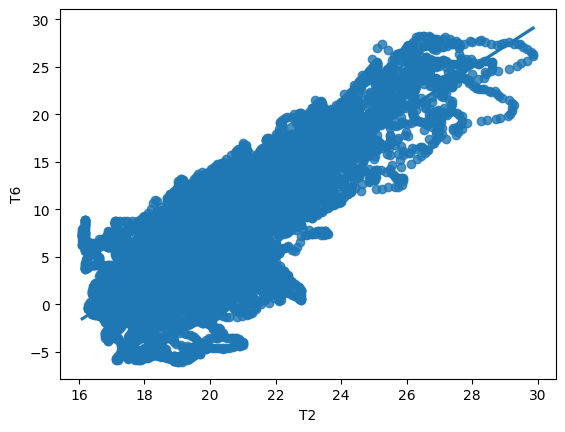

In [18]:
sns.regplot(x='T2', y='T6', data=energy_data)

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [32]:
subset_data = energy_data[['T2', 'T6']]

In [33]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(subset_data)

In [49]:
X = subset_data.drop("T6", axis=1)
y = subset_data["T6"]


In [52]:
print(X_train.shape)
print(y_train.shape)

(13814, 1)
(13814,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_predicted = linear_model.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
mae = mean_absolute_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)


In [62]:
print(round(rmse, 3))
print(round(mae, 3))
print(round(r2))

3.612
2.817
1
